This is a guided project I completed from Coursera Project Network.

## About The Data: 

The [Breast Cancer Diagnostic data](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) is available on the UCI Machine Learning Repository. This database is also available through the [UW CS ftp server](http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/).

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

**Attribute Information**:

- ID number
- Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter) 
2. texture (standard deviation of gray-scale values) 
3. perimeter 
4. area 
5. smoothness (local variation in radius lengths) 
6. compactness (perimeter^2 / area - 1.0) 
7. concavity (severity of concave portions of the contour) 
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

## Importing Libraries and Data

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import time

In [7]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<h1 align=center> Analysis </h1>

---

## Seperating target from features: 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
y = data['diagnosis']
x = data.drop(['id','diagnosis', 'Unnamed: 32'], axis=1)
data= x

## Plotting diagnosis data

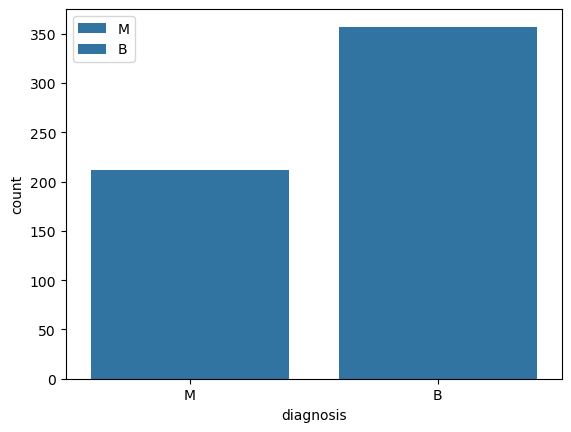

In [13]:
M, B = y.value_counts()
count = {'M':M, 'B':B}
ax = sns.countplot(x= y, label=count)

We must note the class imbalance in the dataset, we might want to change the sampling when training some ML algorithms on this dataset. 

In [15]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Now let's standardise the dataset.

In [17]:
scaler = StandardScaler()
data_std = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data1 = pd.concat([y, data_std.iloc[:, 0:15]], axis=1 )
data1 = pd.melt(data1, id_vars='diagnosis',
              var_name= 'features',
              value_name= 'value')

Now, let's see how the data is distributed and correlated:

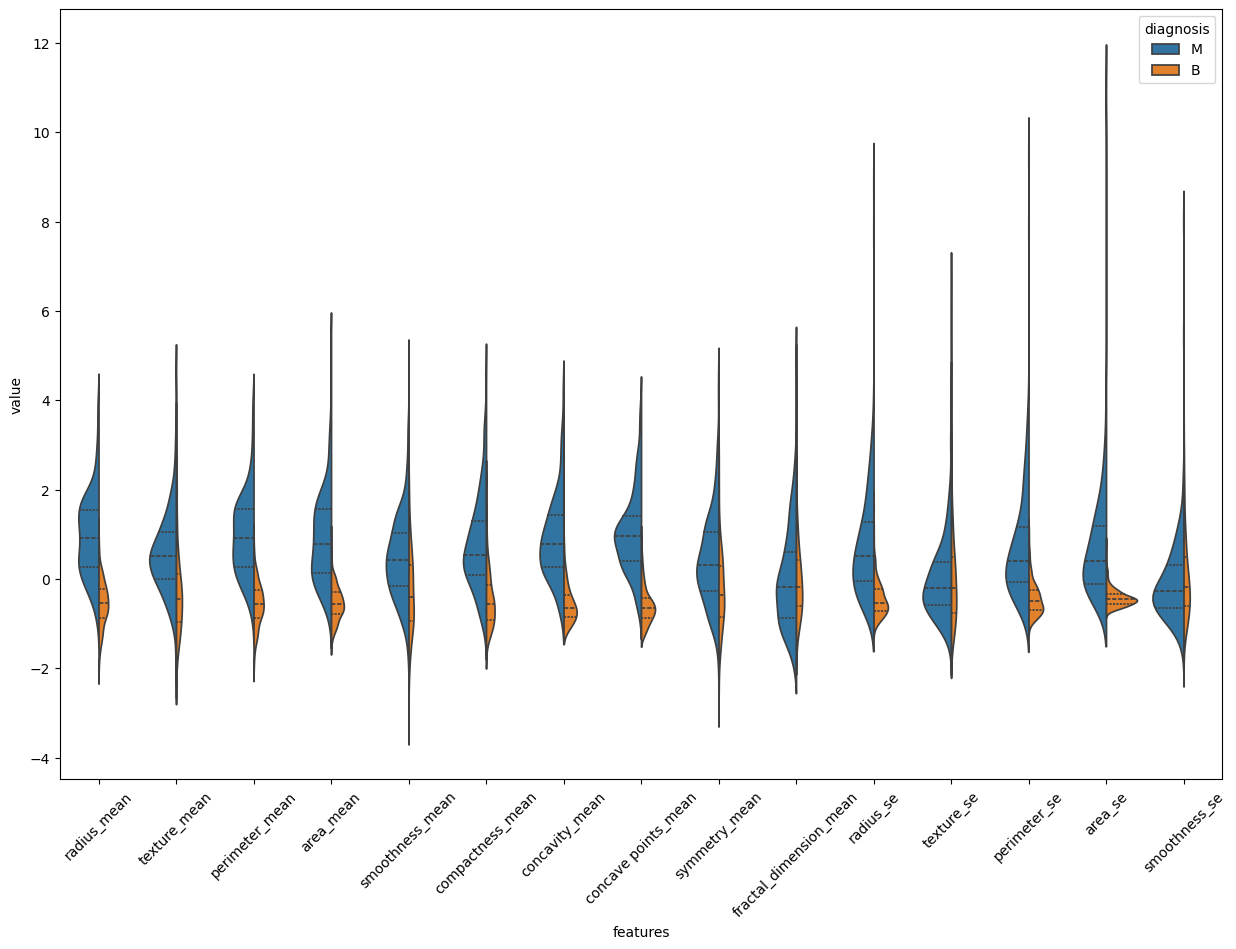

In [19]:
plt.figure(figsize=(15,10))
sns.violinplot(x='features',y='value', hue='diagnosis', data=data1, split = True, inner='quart')
plt.xticks(rotation=45)
plt.show()

In [20]:
data2 = pd.concat([y, data_std.iloc[:, 15:-1]], axis=1 )
data2 = pd.melt(data2, id_vars='diagnosis',
              var_name= 'features',
              value_name= 'value')

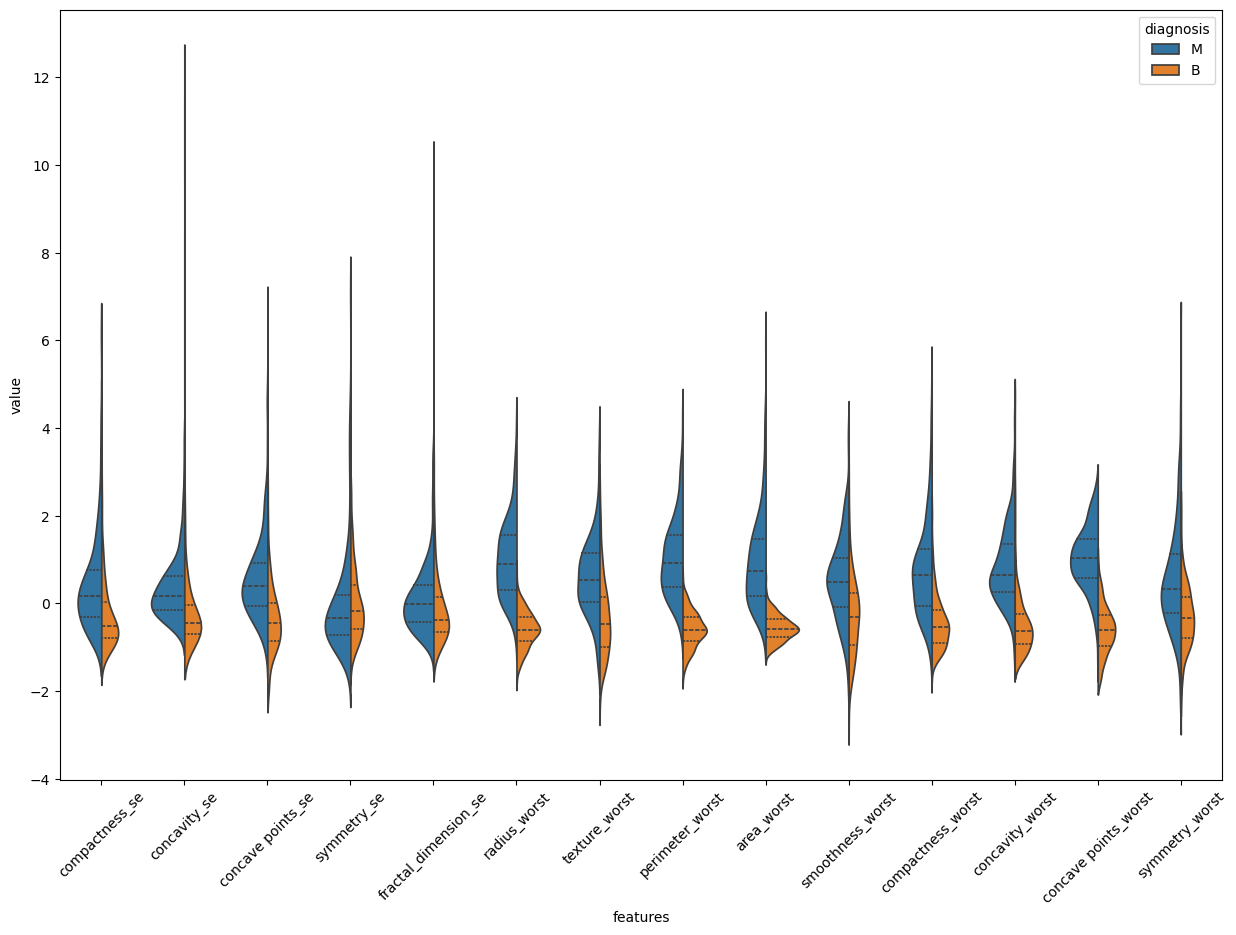

In [21]:
plt.figure(figsize=(15,10))
sns.violinplot(x='features',y='value', hue='diagnosis', data=data2, split = True, inner='quart')
plt.xticks(rotation=45)
plt.show()

In [22]:
"""
sns.set(style='whitegrid', palette='muted')

data = pd.concat([diagnosis, data_std.iloc[:, 0:10]], axis=1 )
data = pd.melt(data, id_vars='diagnosis',
              var_name= 'features',
              value_name= 'value')
plt.figure(figsize=(16,12))
sns.swarmplot(x='features',y='value', hue='diagnosis', data=data)
plt.xticks(rotation=45)
plt.show()

sns.set(style='whitegrid', palette='muted')

data = pd.concat([diagnosis, data_std.iloc[:, 10:21]], axis=1 )
data = pd.melt(data, id_vars='diagnosis',
              var_name= 'features',
              value_name= 'value')
plt.figure(figsize=(16,12))
sns.swarmplot(x='features',y='value', hue='diagnosis', data=data)
plt.xticks(rotation=45)
plt.show()

sns.set(style='whitegrid', palette='muted')

data = pd.concat([diagnosis, data_std.iloc[:, 21:-1]], axis=1 )
data = pd.melt(data, id_vars='diagnosis',
              var_name= 'features',
              value_name= 'value')
plt.figure(figsize=(16,12))
sns.swarmplot(x='features',y='value', hue='diagnosis', data=data)
plt.xticks(rotation=45)
plt.show()
"""

"\nsns.set(style='whitegrid', palette='muted')\n\ndata = pd.concat([diagnosis, data_std.iloc[:, 0:10]], axis=1 )\ndata = pd.melt(data, id_vars='diagnosis',\n              var_name= 'features',\n              value_name= 'value')\nplt.figure(figsize=(16,12))\nsns.swarmplot(x='features',y='value', hue='diagnosis', data=data)\nplt.xticks(rotation=45)\nplt.show()\n\nsns.set(style='whitegrid', palette='muted')\n\ndata = pd.concat([diagnosis, data_std.iloc[:, 10:21]], axis=1 )\ndata = pd.melt(data, id_vars='diagnosis',\n              var_name= 'features',\n              value_name= 'value')\nplt.figure(figsize=(16,12))\nsns.swarmplot(x='features',y='value', hue='diagnosis', data=data)\nplt.xticks(rotation=45)\nplt.show()\n\nsns.set(style='whitegrid', palette='muted')\n\ndata = pd.concat([diagnosis, data_std.iloc[:, 21:-1]], axis=1 )\ndata = pd.melt(data, id_vars='diagnosis',\n              var_name= 'features',\n              value_name= 'value')\nplt.figure(figsize=(16,12))\nsns.swarmplot(x

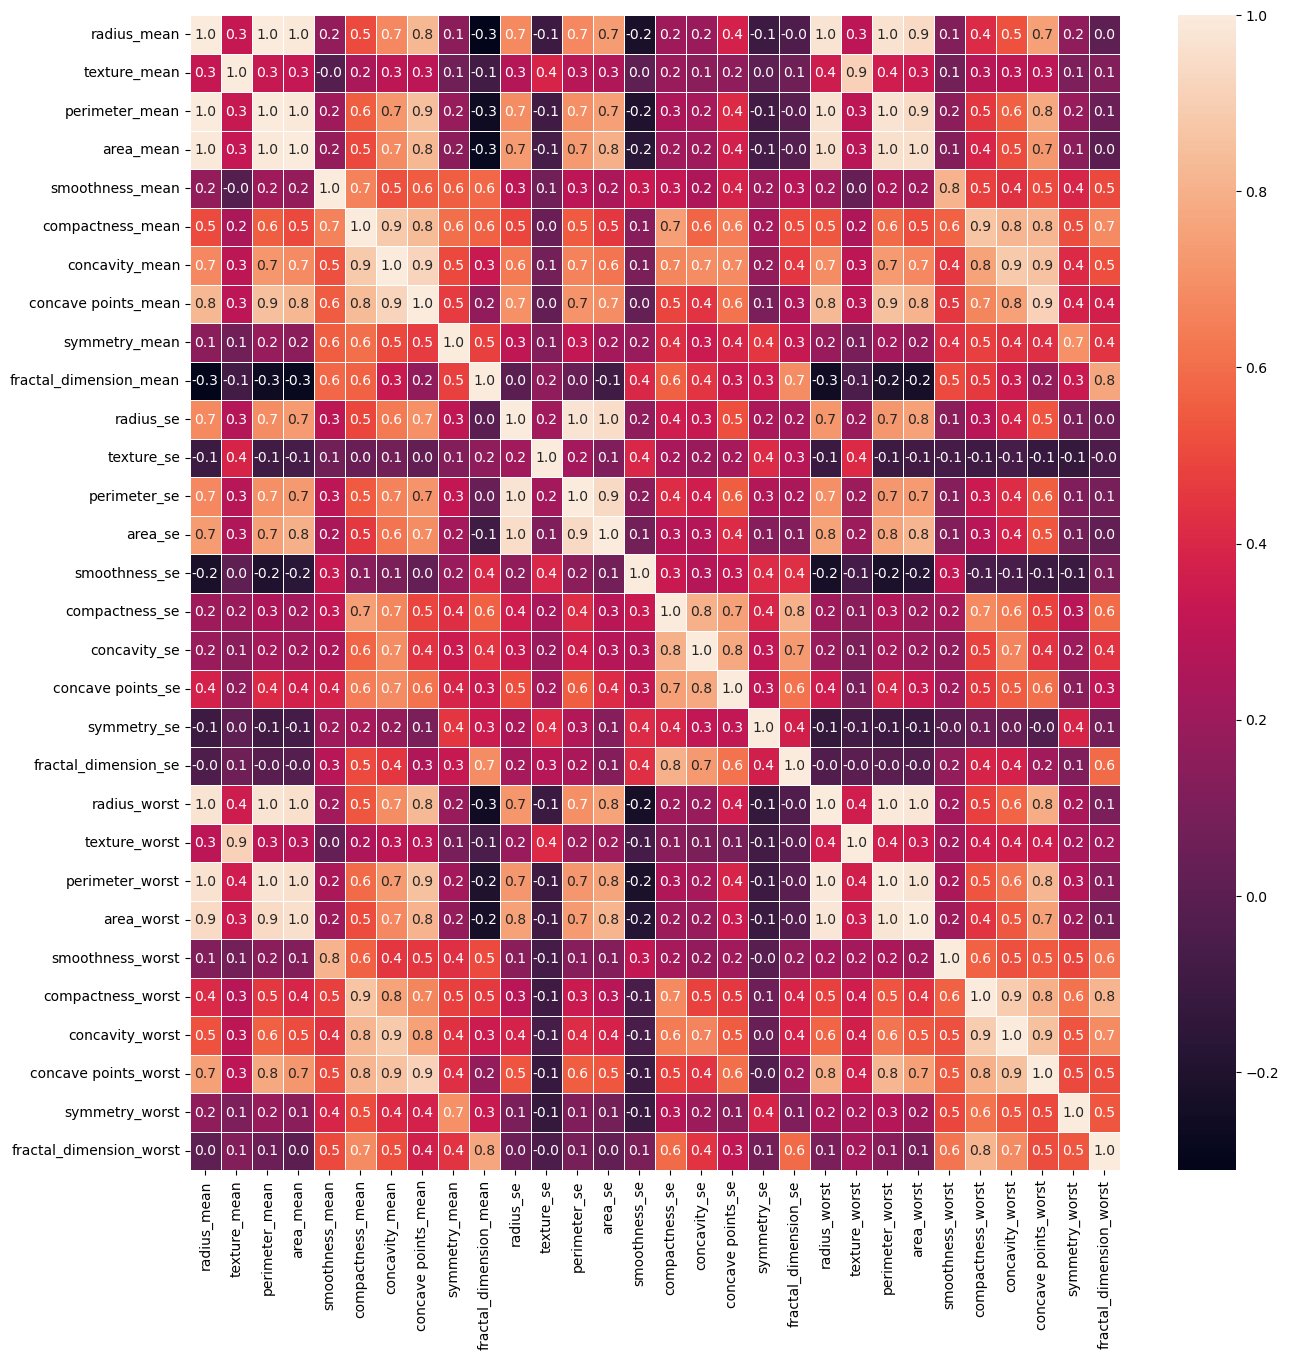

In [23]:
f,ax= plt.subplots(figsize=(15,15))
sns.heatmap(x.corr(), annot= True, linewidth=.5, fmt='.1f',ax=ax);

## Feature Selection (by correlation)

We will first drop one feature from each pair of highly correlated features.

In [26]:
columns = x.columns
DC = np.triu(x.corr()[x.corr() >=0.9]-np.identity(30))
DC[np.isnan(DC)] = 0
DC = columns[DC.sum(axis = 0)>0]
DC

Index(['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se',
       'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'concave points_worst'],
      dtype='object')

In [27]:
df=x.drop(DC,axis=1)

In [28]:
df.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


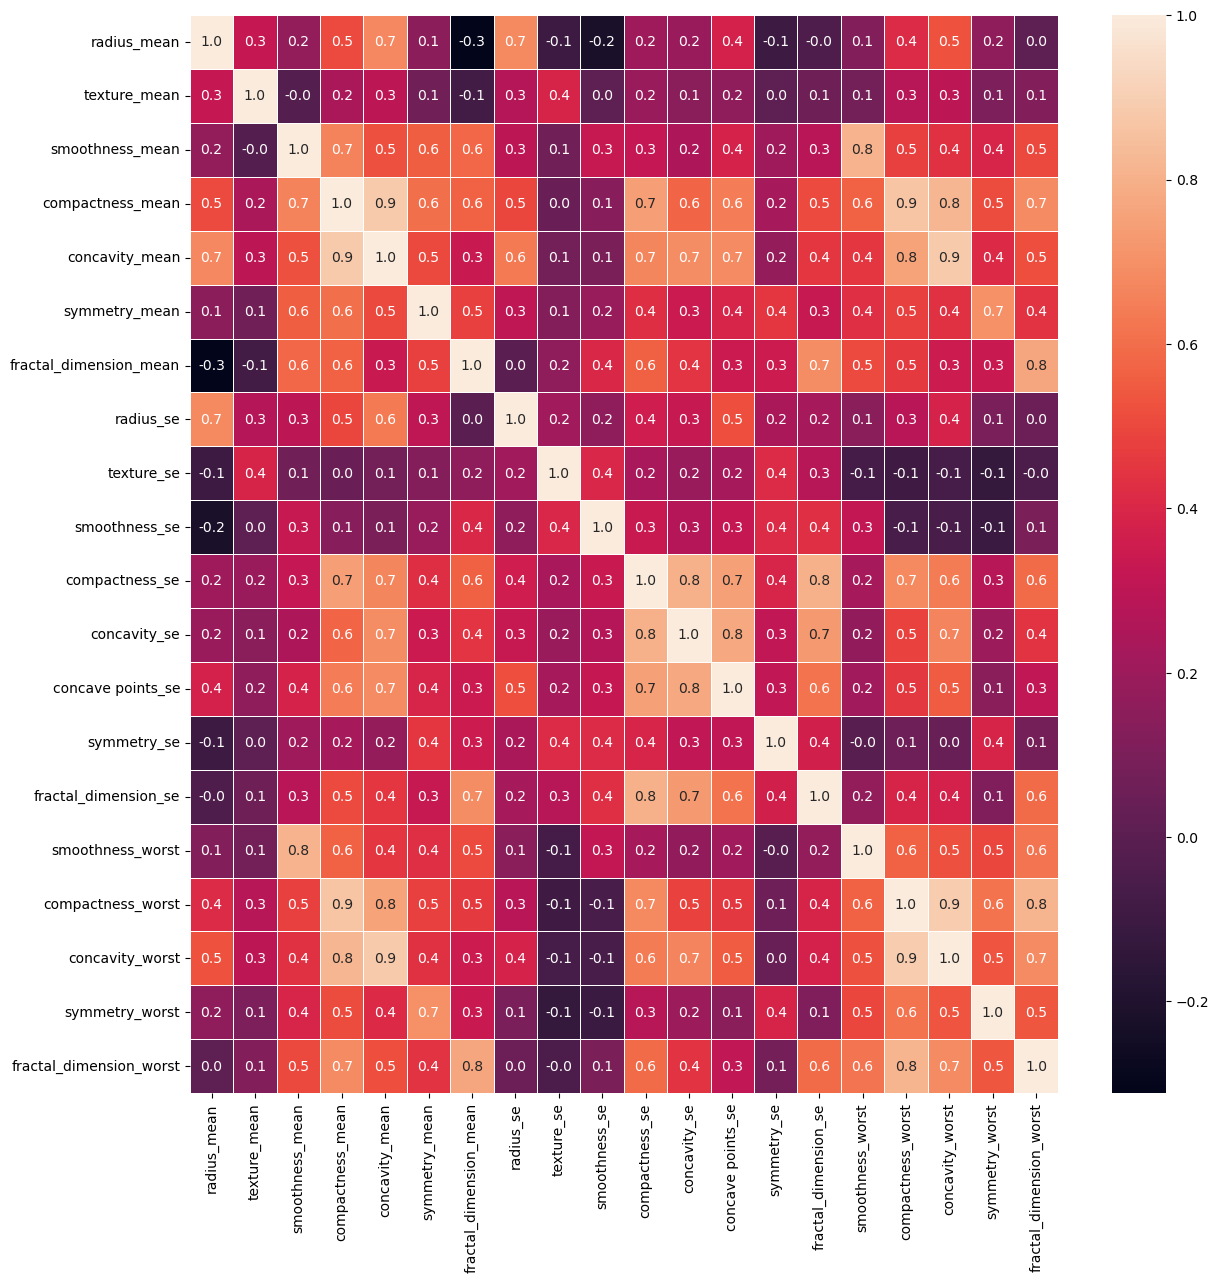

In [29]:
f,ax= plt.subplots(figsize=(14,14))
sns.heatmap(df.corr(), annot= True, linewidth=.5, fmt='.1f',ax=ax);

## Classification

In [31]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

In [32]:
y = y.map({'M': 1, 'B': 0})

x_train,x_test,y_train,y_test= train_test_split(df,y, test_size=0.3)

In [33]:
clf_1 = xgb.XGBClassifier()
clf_1 = clf_1.fit(x_train,y_train)

Accuracy of the model is:  0.935672514619883


<Axes: >

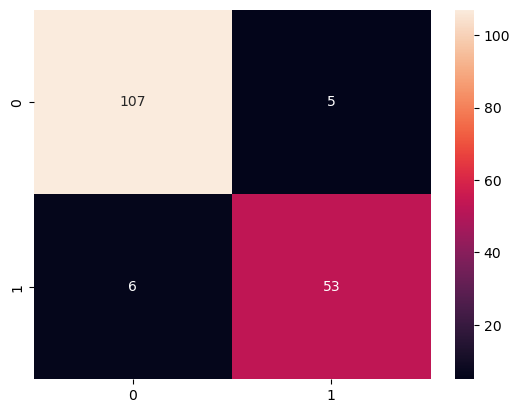

In [34]:
print('Accuracy of the model is: ',accuracy_score(y_test ,clf_1.predict(x_test) ))

cm = confusion_matrix(y_test ,clf_1.predict(x_test) )
sns.heatmap(cm,annot= True, fmt='d')

## Univariate feature sellection

In [36]:
from sklearn.feature_selection import SelectKBest, chi2

In [37]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3)

In [38]:
select_features = SelectKBest(chi2, k=10).fit(x_train, y_train)
print(select_features.scores_)
print(x_train.columns)

[1.76885004e+02 7.57858748e+01 1.33229182e+03 3.60519228e+04
 1.02379815e-01 3.63464162e+00 1.35718029e+01 7.08395300e+00
 1.62714260e-01 3.64394803e-05 2.33594564e+01 1.43200395e-02
 1.67941678e+02 5.88467230e+03 3.49310610e-04 4.41703127e-01
 7.81550762e-01 1.94602770e-01 5.57503441e-04 3.87899520e-03
 3.25070419e+02 1.29833199e+02 2.40589371e+03 7.46035541e+04
 2.96976206e-01 1.33463430e+01 2.73834043e+01 9.04882214e+00
 7.90064245e-01 1.65294399e-01]
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave 

In [39]:
x_train_2 = select_features.transform(x_train)
x_test_2 = select_features.transform(x_test)

In [40]:
clf_2 = xgb.XGBClassifier()
clf_2 = clf_2.fit(x_train_2,y_train)

Accuracy of the model is:  0.9415204678362573


<Axes: >

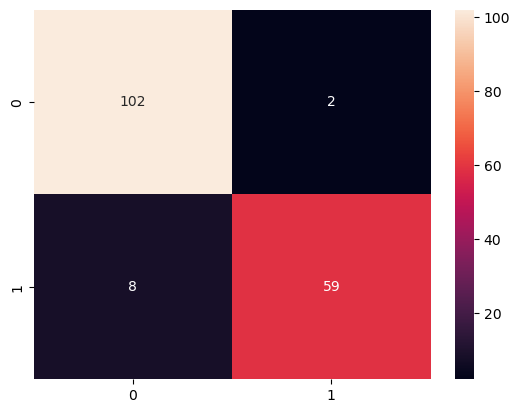

In [41]:
print('Accuracy of the model is: ',accuracy_score(y_test ,clf_2.predict(x_test_2) ))

cm_2 = confusion_matrix(y_test ,clf_2.predict(x_test_2) )
sns.heatmap(cm_2,annot= True, fmt='d')

## Reccursive feature elimnation with cross-validation

In [43]:
from sklearn.feature_selection import RFECV
clf_3 = xgb.XGBClassifier()
rfecv = RFECV(estimator = clf_3, step = 2,cv = 5, scoring = 'accuracy', n_jobs=-1).fit(x_train,y_train)
print('Optimal number of features: ',rfecv.n_features_)
print('best features: ', x_train.columns[rfecv.support_])

Optimal number of features:  16
best features:  Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'concavity_mean',
       'concave points_mean', 'fractal_dimension_mean', 'radius_se', 'area_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')


In [44]:
print('Accuracy of the model is: ',accuracy_score(y_test ,rfecv.predict(x_test) ))

Accuracy of the model is:  0.9649122807017544


## Feautre extraction using Principle Component Analysis

In [46]:
scalar = StandardScaler()
data_std = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_train,x_test,y_train,y_test= train_test_split(data_std,y, test_size=0.3)

In [47]:
from sklearn.decomposition import PCA

Text(0, 0.5, 'Cumulative explained variance')

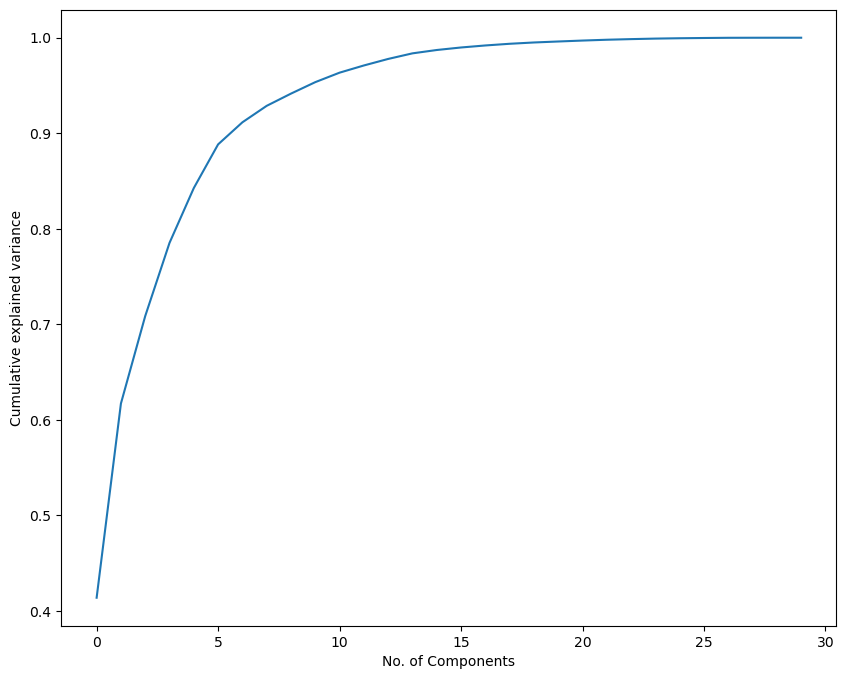

In [48]:
pca = PCA()
pca.fit(x_train)

plt.figure(1, figsize=(10,8))
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of Components')
plt.ylabel('Cumulative explained variance')